In [1]:
import qiskit

In [2]:
qiskit.__version__

'1.3.2'

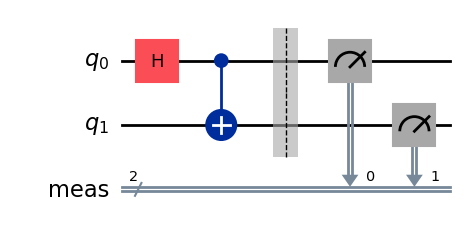

In [4]:
from qiskit import QuantumCircuit, QuantumRegister

qubits = QuantumRegister(2, name='q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0,q1)
circuit.measure_all()

circuit.draw('mpl')

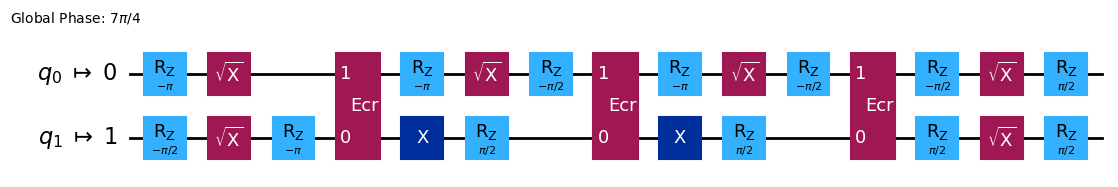

In [8]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService


q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0,q1)

service = QiskitRuntimeService(channel="ibm_quantum",
token="3df3116811b0900901a8d772daf8d8eacc6243a08b8f45a9abcb426dafda3062d76ce4a9e01fdc68e18b0f780fd5fd9084a773382ddd5b655834540dd34b51ab")
backend = service.backend("ibm_brisbane")
pass_manager = generate_preset_pass_manager(1, backend=backend)
transpiled = pass_manager.run(circuit)

transpiled.draw("mpl", idle_wires=False)

In [9]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator

qubits = QuantumRegister(2, name='q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0,q1)

observable = SparsePauliOp("ZZ")

estimator = Estimator()
job = estimator.run(circuit, observable)
exact_value = job.result().values[0]
print(exact_value)

1.0


In [12]:
from qiskit_aer.noise import NoiseModel, ReadoutError, depolarizing_error
from qiskit_aer.primitives import Estimator
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum",
                            token="3df3116811b0900901a8d772daf8d8eacc6243a08b8f45a9abcb426dafda3062d76ce4a9e01fdc68e18b0f780fd5fd9084a773382ddd5b655834540dd34b51ab")
backend = service.backend("ibm_brisbane")
noise_model = NoiseModel.from_backend(backend)

estimator = Estimator(backend_options=dict(noise_model=noise_model))

################################################################################

from qiskit_aer.noise import NoiseModel, ReadoutError, depolarizing_error

noise_model = NoiseModel()
cx_depolarasing_prob = 0.02
bit_flip_prob = 0.05
noise_model.add_all_qubit_quantum_error(
    depolarizing_error(cx_depolarasing_prob, 2), ["cx"]
)
noise_model.add_all_qubit_quantum_error(
    ReadoutError(
        [
            [1 - bit_flip_prob, bit_flip_prob],
            [bit_flip_prob, 1 - bit_flip_prob],
        ]
    )
)

TypeError: NoiseModel.add_all_qubit_quantum_error() missing 1 required positional argument: 'instructions'